### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from pandas.io.json import json_normalize
import pandas_profiling
plt.figure(figsize=(22,8))

<Figure size 1584x576 with 0 Axes>

<Figure size 1584x576 with 0 Axes>

### Reading data

In [2]:
data = pd.read_json('customersdata.json', lines=True)
data.head()

,fraudulent,customer,orders,paymentMethods,transactions
0,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...","[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,False,"{'customerEmail': 'andersonwilliam@yahoo.com',...","[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,False,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...","[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,True,"{'customerEmail': 'uchen@malone.com', 'custome...","[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


### Info of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
fraudulent        168 non-null bool
customer          168 non-null object
orders            168 non-null object
paymentMethods    168 non-null object
transactions      168 non-null object
dtypes: bool(1), object(4)
memory usage: 5.5+ KB


### Shape of data

In [4]:
print("data Shape : {}".format(data.shape))

data Shape : (168, 5)


### Missing values

In [5]:
print(pd.isnull(data).sum())

fraudulent        0
customer          0
orders            0
paymentMethods    0
transactions      0
dtype: int64


### Checking fraudulent example

In [6]:
data['fraudulent'][1]

True

In [7]:
data['customer'][1]

{'customerEmail': 'evansjeffery@yahoo.com',
 'customerPhone': '1-788-091-7546',
 'customerDevice': 'r0jpm7xaeqqa3kr6mzum',
 'customerIPAddress': '219.173.211.202',
 'customerBillingAddress': '356 Elizabeth Inlet Suite 120\nPort Joshuabury, NM 37681'}

In [8]:
data['orders'][1]

[{'orderId': 'nlghpa',
  'orderAmount': 45,
  'orderState': 'fulfilled',
  'orderShippingAddress': '898 Henry Ports\nNew Keithview, CA 95893-2497'},
 {'orderId': 'uw0eeb',
  'orderAmount': 23,
  'orderState': 'fulfilled',
  'orderShippingAddress': '356 Elizabeth Inlet Suite 120\nPort Joshuabury, NM 37681'},
 {'orderId': 'bn44oh',
  'orderAmount': 43,
  'orderState': 'fulfilled',
  'orderShippingAddress': '5093 Bryan Forks\nJoshuaton, FM 01565-9801'}]

In [9]:
data['paymentMethods'][1]

[{'paymentMethodId': 'y3xp697jx',
  'paymentMethodRegistrationFailure': True,
  'paymentMethodType': 'bitcoin',
  'paymentMethodProvider': 'VISA 16 digit',
  'paymentMethodIssuer': 'Solace Banks'},
 {'paymentMethodId': '6krszxc05',
  'paymentMethodRegistrationFailure': False,
  'paymentMethodType': 'card',
  'paymentMethodProvider': 'VISA 16 digit',
  'paymentMethodIssuer': 'Vertex Bancorp'},
 {'paymentMethodId': '5z1szj2he',
  'paymentMethodRegistrationFailure': False,
  'paymentMethodType': 'card',
  'paymentMethodProvider': 'Diners Club / Carte Blanche',
  'paymentMethodIssuer': 'His Majesty Bank Corp.'},
 {'paymentMethodId': 'm52tx8e1s',
  'paymentMethodRegistrationFailure': False,
  'paymentMethodType': 'card',
  'paymentMethodProvider': 'Mastercard',
  'paymentMethodIssuer': 'Vertex Bancorp'},
 {'paymentMethodId': '41ug157xz',
  'paymentMethodRegistrationFailure': False,
  'paymentMethodType': 'bitcoin',
  'paymentMethodProvider': 'American Express',
  'paymentMethodIssuer': 'Bas

In [10]:
data['transactions'][1]

[{'transactionId': '5mi94sfw',
  'orderId': 'nlghpa',
  'paymentMethodId': '41ug157xz',
  'transactionAmount': 45,
  'transactionFailed': False},
 {'transactionId': 'br8ba1nu',
  'orderId': 'uw0eeb',
  'paymentMethodId': '41ug157xz',
  'transactionAmount': 23,
  'transactionFailed': False},
 {'transactionId': 'a33145ss',
  'orderId': 'bn44oh',
  'paymentMethodId': 'y3xp697jx',
  'transactionAmount': 43,
  'transactionFailed': True}]

### Checking non-fraudulent example

In [11]:
data['fraudulent'][0]

False

In [12]:
data['customer'][0]

{'customerEmail': 'josephhoward@yahoo.com',
 'customerPhone': '400-108-5415',
 'customerDevice': 'yyeiaxpltf82440jnb3v',
 'customerIPAddress': '8.129.104.40',
 'customerBillingAddress': '5493 Jones Islands\nBrownside, CA 51896'}

In [13]:
data['orders'][0]

[{'orderId': 'vjbdvd',
  'orderAmount': 18,
  'orderState': 'pending',
  'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'},
 {'orderId': 'yp6x27',
  'orderAmount': 26,
  'orderState': 'fulfilled',
  'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'}]

In [14]:
data['paymentMethods'][0]

[{'paymentMethodId': 'wt07xm68b',
  'paymentMethodRegistrationFailure': True,
  'paymentMethodType': 'card',
  'paymentMethodProvider': 'JCB 16 digit',
  'paymentMethodIssuer': 'Citizens First Banks'}]

In [15]:
data['transactions'][0]

[{'transactionId': 'a9lcj51r',
  'orderId': 'vjbdvd',
  'paymentMethodId': 'wt07xm68b',
  'transactionAmount': 18,
  'transactionFailed': False},
 {'transactionId': 'y4wcv03i',
  'orderId': 'yp6x27',
  'paymentMethodId': 'wt07xm68b',
  'transactionAmount': 26,
  'transactionFailed': False}]

### Fraudulent and Non-Fraudulent

In [16]:
print(data.fraudulent.value_counts())

False    107
True      61
Name: fraudulent, dtype: int64


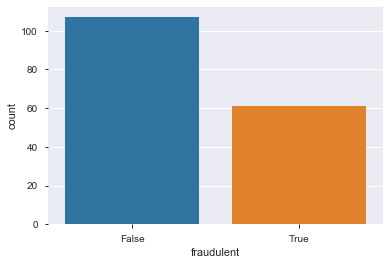

In [17]:
sns.countplot(data['fraudulent'])

### Customer data

In [18]:
customer_data = json_normalize(data['customer'])

In [19]:
customer_data.head(10)

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."
5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7..."
6,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325"
7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074"
8,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661
9,ubranch@rivera-parker.info,(772)964-8162x6310,6mpx027neyz6sh04n3ue,86.16.65.228,"6974 Robertson Common Apt. 902\nPort Juanside,..."


### Adding fraudulent column in customer data

In [20]:
customer_data['fraudulent'] = data['fraudulent']
customer_data

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,fraudulent
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",True
5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",True
6,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",True
7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",True
8,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661,False
9,ubranch@rivera-parker.info,(772)964-8162x6310,6mpx027neyz6sh04n3ue,86.16.65.228,"6974 Robertson Common Apt. 902\nPort Juanside,...",True


### Changing the name of a column which will be used later for merging

In [21]:
customer_data.rename(columns = {'customerBillingAddress':'orderShippingAddress'}, inplace = True)

In [22]:
customer_data

,customerEmail,customerPhone,customerDevice,customerIPAddress,orderShippingAddress,fraudulent
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",True
5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",True
6,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",True
7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",True
8,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661,False
9,ubranch@rivera-parker.info,(772)964-8162x6310,6mpx027neyz6sh04n3ue,86.16.65.228,"6974 Robertson Common Apt. 902\nPort Juanside,...",True


In [23]:
customer_data.fraudulent.value_counts()

False    107
True      61
Name: fraudulent, dtype: int64

In [24]:
customer_data.customerEmail.value_counts()

johnlowery@gmail.com             8
kwalsh@lopez-gomez.biz           1
cindydeleon@yahoo.com            1
mtrevino@gutierrez.net           1
vreyes@cruz.info                 1
                                ..
ctaylor@yahoo.com                1
robinsoncynthia@dunn.com         1
kristina41@gmail.com             1
aliciaanthony@martin.com         1
hamiltonchristopher@yahoo.com    1
Name: customerEmail, Length: 161, dtype: int64

In [25]:
customer_data.orderShippingAddress.value_counts()

49680 Brian Squares Apt. 122\nPort Walterburgh, MH 02766-0708    3
8478 Sean Ridges Apt. 441\nDavisberg, PR 72250                   1
813 Miller Lakes\nLake Christina, SD 29778-1298                  1
96103 Riley Walks\nMichellefort, ID 98085-6066                   1
046 Carson Crescent\nSouth Jacksonview, NV 22839-2652            1
                                                                ..
6790 Cassandra Loop\nDavidton, ME 00036                          1
USNS Price\nFPO AE 14661                                         1
150 Kenneth Bypass Apt. 791\nKevinton, VT 92488                  1
12350 Nicholas Greens\nLawsonborough, NC 70237-3962              1
9205 Jeremiah Field Suite 815\nEast Christopher, IA 93399        1
Name: orderShippingAddress, Length: 166, dtype: int64

In [26]:
customer_data.customerIPAddress.value_counts()

45.203.99.249                              4
77a1:d842:acfc:5d50:a803:70c1:4f8b:7cfc    1
43.166.163.164                             1
72.251.102.162                             1
f82c:811f:8a02:e2d6:79b:fcaa:42de:570b     1
                                          ..
188.74.171.130                             1
225.62.150.241                             1
35.212.254.226                             1
146.191.70.148                             1
227.48.202.65                              1
Name: customerIPAddress, Length: 165, dtype: int64

### Orders data

In [27]:
orders_data = json_normalize(data=data.to_dict('records'), record_path='orders')

In [28]:
orders_data.head(10)

,orderId,orderAmount,orderState,orderShippingAddress
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"
5,yk34y2,33,failed,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
6,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
7,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914"
8,fbz9ep,34,fulfilled,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
9,7odnn6,26,fulfilled,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."


In [29]:
print(orders_data.orderState.value_counts())

fulfilled    400
failed        50
pending       28
Name: orderState, dtype: int64


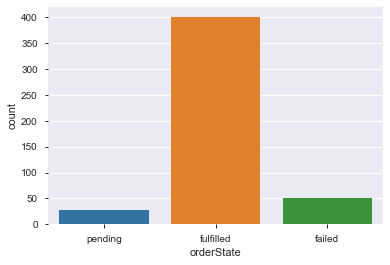

In [30]:
sns.countplot(orders_data.orderState)

### Payments Method data

In [31]:
paymentMethods_data = json_normalize(data=data.to_dict('records'), record_path='paymentMethods')

In [32]:
paymentMethods_data.head(10)

,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,m52tx8e1s,False,card,Mastercard,Vertex Bancorp
5,41ug157xz,False,bitcoin,American Express,Bastion Banks
6,4dpg5sx2b,False,card,Maestro,Her Majesty Trust
7,bcx9pa3wf,False,card,JCB 16 digit,Fountain Financial Inc.
8,8pneoi03z,False,card,JCB 16 digit,Bastion Banks
9,dluy3jka0,False,card,Discover,His Majesty Bank Corp.


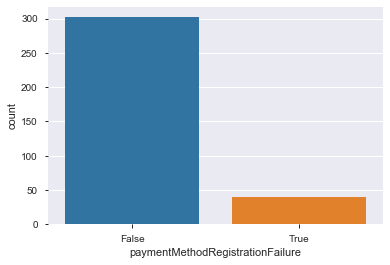

In [33]:
sns.countplot(paymentMethods_data.paymentMethodRegistrationFailure)

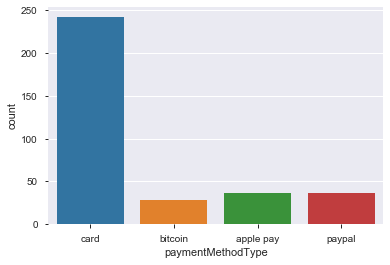

In [34]:
sns.countplot(paymentMethods_data.paymentMethodType)

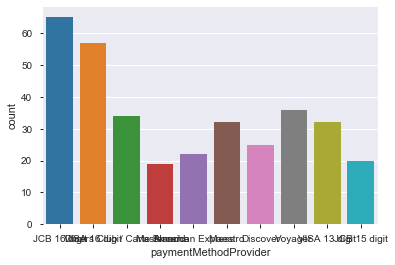

In [35]:
sns.countplot(paymentMethods_data.paymentMethodProvider)

### Transactions data

In [36]:
transactions_data = json_normalize(data=data.to_dict('records'), record_path='transactions')

In [37]:
transactions_data.head(10)

,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed
0,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,y4wcv03i,yp6x27,wt07xm68b,26,False
2,5mi94sfw,nlghpa,41ug157xz,45,False
3,br8ba1nu,uw0eeb,41ug157xz,23,False
4,a33145ss,bn44oh,y3xp697jx,43,True
5,q3lyvbza,yk34y2,8pneoi03z,33,False
6,3alf9irw,28v6b0,8pneoi03z,24,True
7,69w9wymx,28v6b0,8pneoi03z,24,False
8,pegqc4ud,itnk8y,dluy3jka0,25,True
9,uo3slwh7,itnk8y,8pneoi03z,25,False


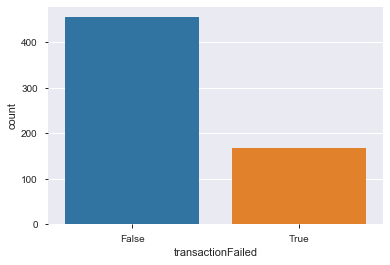

In [38]:
sns.countplot(transactions_data.transactionFailed)

### Merging all

In [39]:
order_transaction = pd.merge(orders_data, transactions_data, on='orderId')

In [40]:
order_transaction_payment = pd.merge(order_transaction, paymentMethods_data, on='paymentMethodId')

In [41]:
customer_order_transaction_payment_data = pd.merge(order_transaction_payment, customer_data, on='orderShippingAddress')

In [42]:
customer_order_transaction_payment_data

,orderId,orderAmount,orderState,orderShippingAddress,transactionId,paymentMethodId,transactionAmount,transactionFailed,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,customerEmail,customerPhone,customerDevice,customerIPAddress,fraudulent
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,wt07xm68b,18,False,True,card,JCB 16 digit,Citizens First Banks,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,False
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,wt07xm68b,26,False,True,card,JCB 16 digit,Citizens First Banks,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,False
2,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,41ug157xz,23,False,False,bitcoin,American Express,Bastion Banks,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,True
3,yk34y2,33,failed,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",q3lyvbza,8pneoi03z,33,False,False,card,JCB 16 digit,Bastion Banks,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,False
4,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",3alf9irw,8pneoi03z,24,True,False,card,JCB 16 digit,Bastion Banks,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,False
5,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",69w9wymx,8pneoi03z,24,False,False,card,JCB 16 digit,Bastion Banks,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,False
6,fbz9ep,34,fulfilled,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",vx4cjc27,pdxjdwui4,34,False,False,card,Voyager,Grand Credit Corporation,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,False
7,7odnn6,26,fulfilled,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",yiay9b0n,pdxjdwui4,26,False,False,card,Voyager,Grand Credit Corporation,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,False
8,56h7iw,71,fulfilled,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",q8j3dgni,olr4zf09x,71,False,False,card,VISA 13 digit,Grand Credit Corporation,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,True
9,kowj1v,66,fulfilled,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",xjulqy8x,gehl28i8u,66,True,False,card,JCB 16 digit,Bastion Banks,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,True


### Grouping fraudulent with customer email

In [43]:
fraudulent_customerEmail = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['customerEmail'])
list(fraudulent_customerEmail)

[('1yf0@jedyz63t', 372    True
  373    True
  374    True
  375    True
  376    True
  377    True
  378    True
  379    True
  Name: fraudulent, dtype: bool), ('9es7t@u6n7x', 94    True
  95    True
  Name: fraudulent, dtype: bool), ('abigail08@yahoo.com', 81    False
  Name: fraudulent, dtype: bool), ('alec27@bell.com', 44    False
  45    False
  46    False
  47    False
  48    False
  49    False
  Name: fraudulent, dtype: bool), ('aliciaanthony@martin.com', 331    True
  332    True
  Name: fraudulent, dtype: bool), ('amywright@wallace-johnson.com', 295    True
  296    True
  297    True
  Name: fraudulent, dtype: bool), ('andersonwilliam@yahoo.com', 3    False
  4    False
  5    False
  Name: fraudulent, dtype: bool), ('andre74@patrick-decker.com', 402    True
  Name: fraudulent, dtype: bool), ('anthony04@gmail.com', 182    False
  183    False
  Name: fraudulent, dtype: bool), ('avaldez@gmail.com', 73    False
  74    False
  Name: fraudulent, dtype: bool), ('aweaver@yaho

In [44]:
fraudulent_customerEmail.sum().sort_values(ascending=False)

customerEmail
johnlowery@gmail.com           21.0
1yf0@jedyz63t                   8.0
ctaylor@yahoo.com               8.0
lleonard@turner-fleming.com     8.0
tmcpherson@wright.com           8.0
                               ... 
josephhoward@yahoo.com          0.0
ypruitt@hotmail.com             0.0
joshua00@hotmail.com            0.0
juliecook@hotmail.com           0.0
zgraham@yahoo.com               0.0
Name: fraudulent, Length: 124, dtype: float64

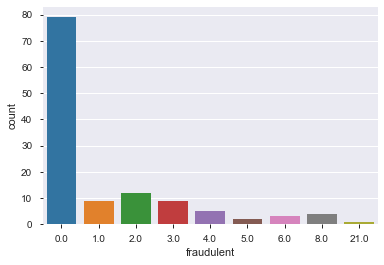

In [45]:
sns.countplot(fraudulent_customerEmail.sum())

### Grouping fraudulent with customer orderShippingAddress

In [46]:
fraudulent_orderShippingAddress = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['orderShippingAddress'])
list(fraudulent_orderShippingAddress)

[('0008 Jessica Stream\nMcbridetown, MH 04017', 385    True
  386    True
  387    True
  Name: fraudulent, dtype: bool),
 ('00373 Hicks Keys Suite 407\nMillerside, HI 98544-8185', 380    False
  381    False
  382    False
  383    False
  384    False
  Name: fraudulent, dtype: bool),
 ('03028 Brown Spring Suite 348\nElliottchester, WY 10834', 369    False
  370    False
  371    False
  Name: fraudulent, dtype: bool),
 ('044 Ronnie Run\nSouth Dawn, CA 49202-3034', 337    False
  338    False
  339    False
  340    False
  Name: fraudulent, dtype: bool),
 ('046 Carson Crescent\nSouth Jacksonview, NV 22839-2652', 171    True
  Name: fraudulent, dtype: bool),
 ('056 Megan Trail Suite 355\nWest Zachary, GU 51278-2318', 312    True
  313    True
  314    True
  315    True
  Name: fraudulent, dtype: bool),
 ('07078 Brent Ways Apt. 999\nAlvarezshire, ND 82309', 63    False
  64    False
  65    False
  66    False
  Name: fraudulent, dtype: bool),
 ('10068 Adam Rapids Suite 792\nRileybur

In [47]:
fraudulent_orderShippingAddress.sum().sort_values(ascending=False)

orderShippingAddress
87096 Warren Turnpike\nHowellview, WA 74727-2420                 8.0
12350 Nicholas Greens\nLawsonborough, NC 70237-3962              8.0
7956 Alex Avenue Apt. 593\nPort Michael, OK 41350                8.0
96103 Riley Walks\nMichellefort, ID 98085-6066                   8.0
49680 Brian Squares Apt. 122\nPort Walterburgh, MH 02766-0708    6.0
                                                                ... 
51448 Robert Flat Suite 980\nWilliamsmouth, FL 67487-5651        0.0
5154 Fernandez Points Apt. 712\nMcguirehaven, MN 91595           0.0
904 James Route Suite 595\nLake Ruth, CO 66976                   0.0
526 Ronald Cliffs\nWest Christinaville, GU 76418                 0.0
Unit 6719 Box 6044\nDPO AE 33534                                 0.0
Name: fraudulent, Length: 127, dtype: float64

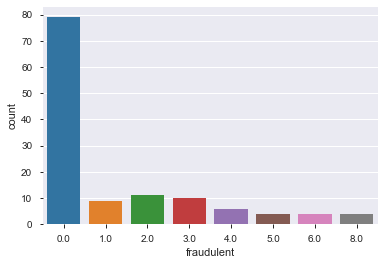

In [48]:
sns.countplot(fraudulent_orderShippingAddress.sum())

### Grouping fraudulent with customer customerIPAddress

In [49]:
fraudulent_customerIPAddress = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['customerIPAddress'])
list(fraudulent_customerIPAddress)

[('101.94.37.245', 272    False
  273    False
  274    False
  275    False
  276    False
  Name: fraudulent, dtype: bool), ('107.82.81.240', 101    False
  102    False
  103    False
  104    False
  105    False
  Name: fraudulent, dtype: bool), ('110.221.131.62', 331    True
  332    True
  Name: fraudulent, dtype: bool), ('114.134.196.43', 286    False
  287    False
  288    False
  289    False
  290    False
  Name: fraudulent, dtype: bool), ('115.137.171.103', 200    True
  203    True
  Name: fraudulent, dtype: bool), ('120.215.98.17', 125    False
  Name: fraudulent, dtype: bool), ('128.61.46.131', 44    False
  45    False
  46    False
  47    False
  48    False
  49    False
  Name: fraudulent, dtype: bool), ('1289:d2a9:c65d:8fc7:7be4:129b:d7b:cf7b',
  82    True
  83    True
  84    True
  85    True
  Name: fraudulent, dtype: bool), ('130.55.185.234', 278    False
  279    False
  280    False
  281    False
  Name: fraudulent, dtype: bool), ('132.132.95.33', 418    

In [50]:
fraudulent_customerIPAddress.sum().sort_values(ascending=False)

customerIPAddress
45.203.99.249                              12.0
97.111.97.42                                8.0
296d:59fe:a919:21ac:16dd:96f5:10b3:4f83     8.0
1fe2:1fa3:2a6f:845d:1037:2dac:2831:9d50     8.0
dda2:66e0:4279:3c1b:ac29:4cbb:5ea3:c26b     8.0
                                           ... 
7243:82ce:52ca:f27b:f116:30c0:f704:59f3     0.0
73.182.31.59                                0.0
8.129.104.40                                0.0
81.13.103.118                               0.0
101.94.37.245                               0.0
Name: fraudulent, Length: 126, dtype: float64

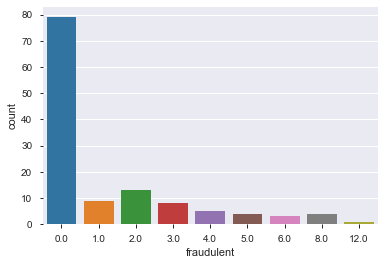

In [51]:
sns.countplot(fraudulent_customerIPAddress.sum())

### Grouping fraudulent with customer orderState

In [52]:
fraudulent_orderState = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['orderState'])
list(fraudulent_orderState)

[('failed', 3      False
  10      True
  15      True
  25      True
  34     False
  38     False
  57     False
  64     False
  82      True
  92     False
  114     True
  115     True
  150     True
  151     True
  152     True
  157    False
  158    False
  163     True
  180    False
  194     True
  196     True
  220     True
  224     True
  225    False
  226    False
  232    False
  269     True
  274    False
  295     True
  309    False
  319    False
  320    False
  329    False
  334    False
  336    False
  344     True
  363    False
  366    False
  367    False
  368    False
  394    False
  395    False
  406     True
  415     True
  Name: fraudulent, dtype: bool), ('fulfilled', 1      False
  2       True
  4      False
  5      False
  6      False
         ...  
  418    False
  419    False
  420    False
  421    False
  422    False
  Name: fraudulent, Length: 355, dtype: bool), ('pending', 0      False
  20     False
  21     False
  22     False
  

In [53]:
fraudulent_orderState.sum().sort_values(ascending=False)

orderState
fulfilled    134.0
failed        19.0
pending        8.0
Name: fraudulent, dtype: float64

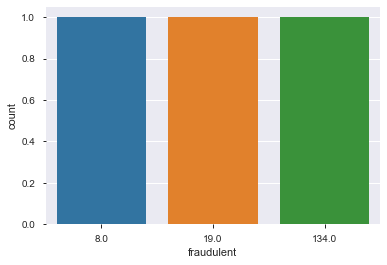

In [54]:
sns.countplot(fraudulent_orderState.sum())

### Grouping fraudulent with customer orderAmount

In [55]:
fraudulent_orderAmount = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['orderAmount'])
list(fraudulent_orderAmount)

[(10, 78     False
  101    False
  117     True
  118     True
  119     True
  190    False
  253    False
  275    False
  276    False
  Name: fraudulent, dtype: bool), (11, 27      True
  50     False
  54     False
  65     False
  66     False
  71     False
  166     True
  167     True
  257    False
  259    False
  288    False
  290    False
  313     True
  318    False
  332     True
  Name: fraudulent, dtype: bool), (12, 26      True
  41     False
  43     False
  45     False
  69     False
  70     False
  72     False
  150     True
  289    False
  373     True
  375     True
  376     True
  377     True
  378     True
  381    False
  383    False
  401    False
  Name: fraudulent, dtype: bool), (13, 284    False
  328    False
  Name: fraudulent, dtype: bool), (14, 51     False
  88     False
  89     False
  109    False
  110    False
  111    False
  112    False
  113    False
  241    False
  244    False
  294    False
  349    False
  408     True
  411   

In [56]:
fraudulent_orderAmount.sum().sort_values(ascending=False)

orderAmount
40    8.0
12    7.0
46    7.0
32    6.0
47    6.0
     ... 
59    1.0
39    1.0
19    0.0
13    0.0
44    0.0
Name: fraudulent, Length: 65, dtype: float64

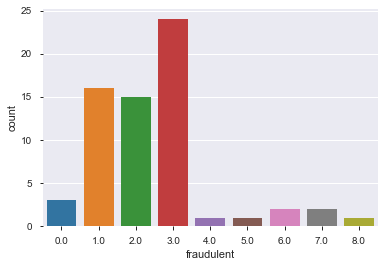

In [57]:
sns.countplot(fraudulent_orderAmount.sum())

In [58]:
# for name, group in customer_order_transaction_payment_data.groupby('customerEmail'): 
#     # print the name of the regiment
#     print(name)
#     # print the data of that regiment
#     print(group)

In [59]:
#list(customer_order_transaction_payment_data.groupby(customer_order_transaction_payment_data.dtypes, axis=1))

### Grouping fraudulent with paymentMethodRegistrationFailure

In [60]:
fraudulent_paymentMethodRegistrationFailure = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['paymentMethodRegistrationFailure'])
list(fraudulent_paymentMethodRegistrationFailure)

[(False, 2       True
  3      False
  4      False
  5      False
  6      False
         ...  
  418    False
  419    False
  420    False
  421    False
  422    False
  Name: fraudulent, Length: 359, dtype: bool), (True, 0      False
  1      False
  63     False
  64     False
  65     False
         ...  
  360     True
  385     True
  386     True
  388    False
  389    False
  Name: fraudulent, Length: 64, dtype: bool)]

In [61]:
fraudulent_paymentMethodRegistrationFailure.sum().sort_values(ascending=False)

paymentMethodRegistrationFailure
False    135.0
True      26.0
Name: fraudulent, dtype: float64

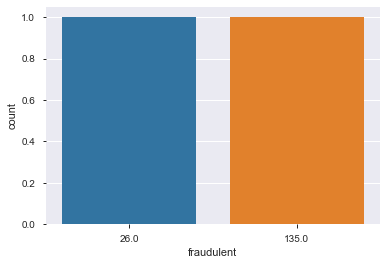

In [62]:
sns.countplot(fraudulent_paymentMethodRegistrationFailure.sum())

### Grouping fraudulent with paymentMethodType

In [63]:
fraudulent_paymentMethodType = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['paymentMethodType'])
list(fraudulent_paymentMethodType)

[('apple pay', 11      True
  13      True
  39      True
  40      True
  61     False
  62     False
  123    False
  124    False
  128     True
  192     True
  193     True
  194     True
  195     True
  196     True
  197     True
  203     True
  204     True
  205     True
  206    False
  207    False
  208    False
  209    False
  252    False
  253    False
  254    False
  286    False
  317     True
  371    False
  383    False
  384    False
  394    False
  395    False
  396    False
  397    False
  398    False
  399    False
  403    False
  404    False
  405    False
  Name: fraudulent, dtype: bool), ('bitcoin', 2       True
  14      True
  15      True
  16      True
  32     False
  43     False
  63     False
  64     False
  65     False
  66     False
  84      True
  85      True
  164     True
  165     True
  172    False
  173    False
  174    False
  175    False
  176    False
  190    False
  191    False
  228    False
  240     True
  295     Tru

In [64]:
fraudulent_paymentMethodType.sum().sort_values(ascending=False)

paymentMethodType
card         123.0
bitcoin       17.0
apple pay     15.0
paypal         6.0
Name: fraudulent, dtype: float64

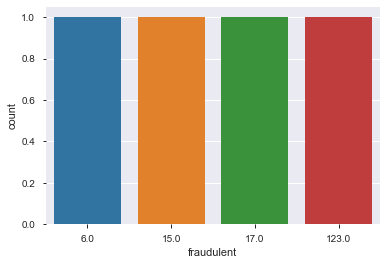

In [65]:
sns.countplot(fraudulent_paymentMethodType.sum())

### Grouping fraudulent with paymentMethodProvider

In [66]:
fraudulent_paymentMethodProvider = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['paymentMethodProvider'])
list(fraudulent_paymentMethodProvider)

[('American Express', 2       True
  13      True
  57     False
  58     False
  59     False
  60     False
  68     False
  69     False
  70     False
  71     False
  114     True
  115     True
  116     True
  147     True
  148     True
  156    False
  157    False
  158    False
  159    False
  160    False
  161    False
  162    False
  192     True
  193     True
  194     True
  200     True
  201     True
  202     True
  252    False
  253    False
  254    False
  260     True
  308     True
  369    False
  383    False
  384    False
  403    False
  404    False
  405    False
  Name: fraudulent, dtype: bool), ('Diners Club / Carte Blanche', 63     False
  64     False
  65     False
  66     False
  101    False
  102    False
  171     True
  186    False
  187    False
  195     True
  196     True
  197     True
  229     True
  230     True
  249     True
  250     True
  255    False
  300     True
  310    False
  311    False
  335    False
  336    False
 

In [67]:
fraudulent_paymentMethodProvider.sum().sort_values(ascending=False)

paymentMethodProvider
VISA 16 digit                  29.0
JCB 16 digit                   27.0
VISA 13 digit                  25.0
Voyager                        18.0
American Express               15.0
Maestro                        13.0
Discover                       11.0
Diners Club / Carte Blanche    10.0
JCB 15 digit                    8.0
Mastercard                      5.0
Name: fraudulent, dtype: float64

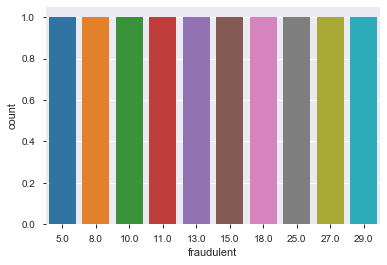

In [68]:
sns.countplot(fraudulent_paymentMethodProvider.sum())

### Grouping fraudulent with paymentMethodIssuer

In [69]:
fraudulent_paymentMethodIssuer = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['paymentMethodIssuer'])
list(fraudulent_paymentMethodIssuer)

[('B', 164    True
  165    True
  312    True
  313    True
  314    True
  315    True
  387    True
  408    True
  409    True
  Name: fraudulent, dtype: bool), ('Bastion Banks', 2       True
  3      False
  4      False
  5      False
  9       True
  10      True
  41     False
  42     False
  94      True
  95      True
  103    False
  104    False
  105    False
  106    False
  107    False
  108    False
  109    False
  110    False
  111    False
  112    False
  113    False
  156    False
  157    False
  158    False
  159    False
  160    False
  161    False
  162    False
  192     True
  193     True
  194     True
  240     True
  243    False
  244    False
  308     True
  333    False
  334    False
  370    False
  372     True
  373     True
  374     True
  375     True
  376     True
  377     True
  378     True
  418    False
  419    False
  420    False
  Name: fraudulent, dtype: bool), ('Bulwark Trust Corp.', 14      True
  15      True
  16      Tru

In [70]:
fraudulent_paymentMethodIssuer.sum().sort_values(ascending=False)

paymentMethodIssuer
Rose Bancshares             21.0
Bulwark Trust Corp.         20.0
Fountain Financial Inc.     18.0
Bastion Banks               17.0
Citizens First Banks        16.0
Solace Banks                12.0
His Majesty Bank Corp.      11.0
Vertex Bancorp              10.0
B                            9.0
Grand Credit Corporation     6.0
Her Majesty Trust            5.0
c                            5.0
e                            5.0
a                            2.0
x                            2.0
r                            1.0
o                            1.0
Name: fraudulent, dtype: float64

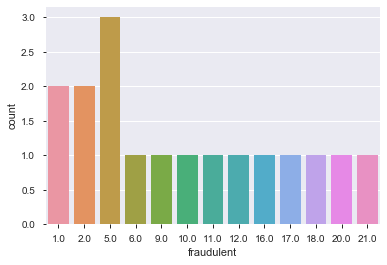

In [71]:
sns.countplot(fraudulent_paymentMethodIssuer.sum())

### Grouping fraudulent with transactionAmount

In [72]:
fraudulent_transactionAmount = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['transactionAmount'])
list(fraudulent_transactionAmount) 

[(10, 78     False
  101    False
  117     True
  118     True
  119     True
  190    False
  253    False
  275    False
  276    False
  Name: fraudulent, dtype: bool), (11, 27      True
  50     False
  54     False
  65     False
  66     False
  71     False
  166     True
  167     True
  257    False
  259    False
  288    False
  290    False
  313     True
  318    False
  332     True
  Name: fraudulent, dtype: bool), (12, 26      True
  41     False
  43     False
  45     False
  69     False
  70     False
  72     False
  150     True
  289    False
  373     True
  375     True
  376     True
  377     True
  378     True
  381    False
  383    False
  401    False
  Name: fraudulent, dtype: bool), (13, 284    False
  328    False
  Name: fraudulent, dtype: bool), (14, 51     False
  88     False
  89     False
  109    False
  110    False
  111    False
  112    False
  113    False
  241    False
  244    False
  294    False
  349    False
  408     True
  411   

In [73]:
fraudulent_transactionAmount.sum().sort_values(ascending=False)

transactionAmount
40    8.0
12    7.0
46    7.0
32    6.0
47    6.0
     ... 
59    1.0
39    1.0
19    0.0
13    0.0
44    0.0
Name: fraudulent, Length: 65, dtype: float64

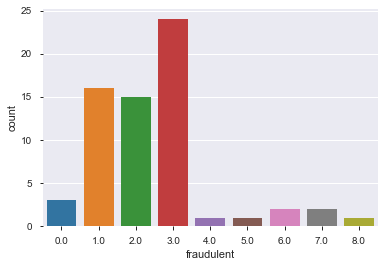

In [74]:
sns.countplot(fraudulent_transactionAmount.sum())

In [75]:
### Grouping fraudulent with transactionFailed

In [76]:
fraudulent_transactionFailed = customer_order_transaction_payment_data['fraudulent'].groupby(customer_order_transaction_payment_data['transactionFailed'])
list(fraudulent_transactionFailed) 

[(False, 0      False
  1      False
  2       True
  3      False
  5      False
         ...  
  416     True
  417     True
  418    False
  420    False
  422    False
  Name: fraudulent, Length: 321, dtype: bool), (True, 4      False
  9       True
  14      True
  20     False
  21     False
         ...  
  394    False
  404    False
  408     True
  419    False
  421    False
  Name: fraudulent, Length: 102, dtype: bool)]

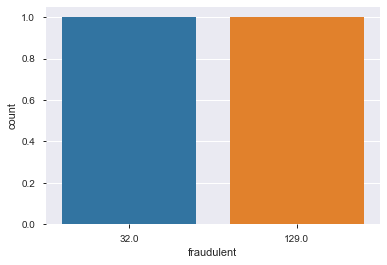

In [77]:
sns.countplot(fraudulent_transactionFailed.sum())

### Dropping the orderAmount as it is identical to transactionAmount

In [80]:
customer_order_transaction_payment_data.drop(['orderAmount'], axis=1, inplace=True)

In [81]:
pandas_profiling.ProfileReport(customer_order_transaction_payment_data)